In [1]:
import matplotlib.pyplot as plt
import arviz as az
import numpyro

numpyro.set_host_device_count(2)

from lqg.io import load_tracking_data

data, blob_widths = load_tracking_data(data_path="../data/")
data.shape

(6, 20, 1068, 2)

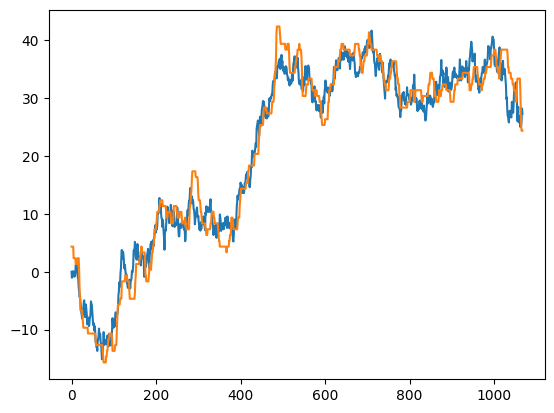

In [2]:
plt.plot(data[0, 0, :, 0])
plt.plot(data[0, 0, :, 1])

In [3]:
from lqg.infer import infer
from lqg.infer.models import lifted_common_model as common_lqg_model
from lqg.tracking import BoundedActor, SubjectiveActor

models = {"BoundedActor": BoundedActor}#, "SubjectiveActor": SubjectiveActor}
results = {}

In [10]:
for model_name, model in models.items():
    results[model_name] = az.from_netcdf(f"../data/processed/{model_name}-2.nc")

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
sigma_0   7.994  0.241   7.539    8.446      0.001    0.001   47768.0   
sigma_1   9.393  0.296   8.865    9.981      0.001    0.001   50841.0   
sigma_2  12.097  0.440  11.294   12.945      0.002    0.001   47981.0   
sigma_3  18.705  0.720  17.408   20.107      0.003    0.002   48858.0   
sigma_4  31.831  1.467  29.176   34.677      0.006    0.005   52488.0   
sigma_5  40.958  1.799  37.669   44.382      0.008    0.006   46722.0   

         ess_tail  r_hat  
sigma_0   29755.0    1.0  
sigma_1   30499.0    1.0  
sigma_2   30984.0    1.0  
sigma_3   29877.0    1.0  
sigma_4   31121.0    1.0  
sigma_5   29415.0    1.0  


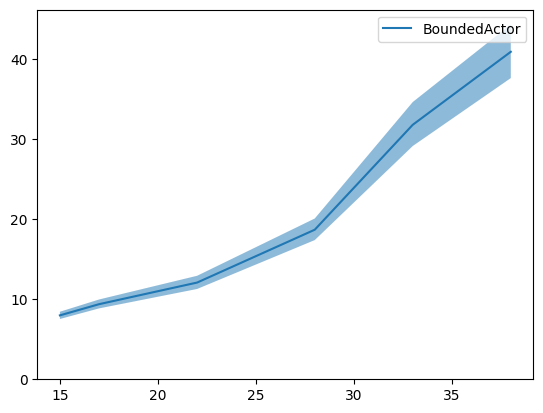

In [11]:
for model_name, inference_data in sorted(results.items()):
    summary = az.summary(inference_data.posterior, var_names=[f"sigma_{i}" for i in range(6)])
    print(summary)

    plt.plot(blob_widths, summary["mean"], label=model_name)
    plt.fill_between(blob_widths, summary["hdi_3%"], summary["hdi_97%"], alpha=0.5)
    plt.ylim(0, )
plt.legend()